In [1]:
# libraries for data manipulation
import pandas as pd
import numpy as np
# data visualization
import seaborn as sns
from matplotlib import pyplot as plt
# reduction of the data dimensionality
from sklearn.decomposition import PCA
# variables scalation 
from sklearn.preprocessing import StandardScaler
# clustering libraries
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [2]:
File_to_work_with = '../Data/Proposed_structures_with_AI_indole_tanimoto_similarity_.xlsx'

In [3]:
initial = pd.read_excel(File_to_work_with)

In [4]:
initial.head()

,Unnamed: 0,new_SMILES,CID,PUBCHEM_SMILES,CC(C)OCC1=CNC2=CC=CC=C21,O=C(C)OCC1=CN(C(C)=O)C2=CC=CC=C21,[N-]=[N+]=NCC1=CC=C(CN2N=NC(COCC3=CNC4=C3C=CC=C4)=C2)C=C1,CCCCOCC1=CNC2=CC=CC=C21,CCC1=NC=CN1CC2=CNC3=CC=CC=C32,CCOCC1=CNC2=CC=CC=C21,...,C12=CC=CC=C1NC=C2COCC3=CN(CCCCCCCCN4N=NC(COCC5=CNC6=C5C=CC=C6)=C4)N=N3,C12=CC=CC=C1NC=C2COCC3=CN(CCCN4N=NC(COCC5=CNC6=C5C=CC=C6)=C4)N=N3,[N-]=[N+]=NCC1=CC(CN=[N+]=[N-])=CC(CN2N=NC(COCC3=CNC4=C3C=CC=C4)=C2)=C1,C12=CC=CC=C1C(CN3C(C=CC=C4)=C4N=C3)=CN2,O=C(C=C1)NC(N1CC2=CNC3=CC=CC=C32)=S,CC(C)CCOCC1=CNC2=CC=CC=C21,O=C1C2=C(C=CC=C2)C(N1CC3=CN(C(C)=C)C4=CC=CC=C43)=O,S=C1N(CC2=CNC3=CC=CC=C32)C(C=CC=C4)=C4S1,CN(C)CC1=CN(C2=C1C=CC=C2)CC3=CNC4=CC=CC=C43,C12=CC=CC=C1NC=C2COCC3=CN(CCCCCN4N=NC(COCC5=CNC6=C5C=CC=C6)=C4)N=N3
0,0,C1=CN(Cc2c[nH]c3ccccc23)CN1,0,0,0.446228,0.370541,0.380471,0.448166,0.365217,0.452459,...,0.365042,0.368990,0.372698,0.354340,0.353900,0.448657,0.440589,0.324612,0.500000,0.365591
1,1,C=C1NCc2cn(c(CC)n2)CC2(C)C=CC=C12,0,0,0.170796,0.270079,0.267843,0.174912,0.286802,0.163701,...,0.263073,0.252809,0.269925,0.249800,0.239249,0.179736,0.303273,0.287977,0.265941,0.262097
2,2,C=C1C=C(C)NCC2C=CC2CN1,0,0,0.074313,0.083995,0.104444,0.080386,0.097964,0.072607,...,0.090909,0.089264,0.102674,0.090580,0.100950,0.086124,0.102041,0.100195,0.096045,0.090144
3,3,C=C1CN(Cc2c[nH]c3ccccc23)C=N1,0,0,0.422680,0.366703,0.379127,0.426686,0.367803,0.427928,...,0.375283,0.372862,0.373196,0.361991,0.346491,0.423188,0.430708,0.332093,0.486550,0.375854
4,4,Cc1ncc2n1CC1=CC=CC1CNC2,0,0,0.160750,0.227615,0.242574,0.161923,0.250000,0.153923,...,0.229706,0.218777,0.244355,0.235808,0.249132,0.167319,0.267129,0.265794,0.241206,0.229636


In [5]:
initial = initial.columns.values.tolist()

In [6]:
initial

['Unnamed: 0',
 'new_SMILES',
 'CID',
 'PUBCHEM_SMILES',
 'CC(C)OCC1=CNC2=CC=CC=C21',
 'O=C(C)OCC1=CN(C(C)=O)C2=CC=CC=C21',
 '[N-]=[N+]=NCC1=CC=C(CN2N=NC(COCC3=CNC4=C3C=CC=C4)=C2)C=C1',
 'CCCCOCC1=CNC2=CC=CC=C21',
 'CCC1=NC=CN1CC2=CNC3=CC=CC=C32',
 'CCOCC1=CNC2=CC=CC=C21',
 'O=C(C(C=CC=C1)=C1C2=O)N2CCCCCCCCN3N=NC(COCC4=CNC5=C4C=CC=C5)=C3',
 'C12=CC=CC=C1C(CN3C=CN=C3)=CN2',
 'C12=CC=CC=C1NC=C2COCC3=CN(CCCCCCCCCCCCN4N=NC(COCC5=CNC6=C5C=CC=C6)=C4)N=N3',
 'CCC1=NC(C)=CN1CC2=CNC3=CC=CC=C32',
 'CC1=NC=CN1CC2=CNC3=CC=CC=C32',
 'O=C(C(C=CC=C1)=C1C2=O)N2CCCCCCCCCCCCN3N=NC(COCC4=CNC5=C4C=CC=C5)=C3',
 'O=C(C=C1)N(CC2=CNC3=C2C=CC=C3)C(N1CC4=CNC5=CC=CC=C54)=O',
 'COCC1=CNC2=CC=CC=C21',
 'CC(C)C1=NC=CN1CC2=CNC3=CC=CC=C32',
 'O=C(C)N(C1=C2C=CC=C1)C=C2CN3N=NC(COCC4=CNC5=C4C=CC=C5)=C3',
 'O=C(CC1=O)N(CC2=CNC3=C2C=CC=C3)C(N1CC4=CNC5=CC=CC=C54)=O',
 'CCCOCC1=CNC2=CC=CC=C21',
 'O=C(C(C=CC=C1)=C1C2=O)N2CCCN3N=NC(COCC4=CNC5=C4C=CC=C5)=C3',
 'C12=CC=CC=C1C(CN3C(C4=CC=CC=C4)N=CC3)=CN2',
 'S=C(N1CCCC1)SCC2=CNC

In [7]:
initial = initial[4:]

In [8]:
initial

['CC(C)OCC1=CNC2=CC=CC=C21',
 'O=C(C)OCC1=CN(C(C)=O)C2=CC=CC=C21',
 '[N-]=[N+]=NCC1=CC=C(CN2N=NC(COCC3=CNC4=C3C=CC=C4)=C2)C=C1',
 'CCCCOCC1=CNC2=CC=CC=C21',
 'CCC1=NC=CN1CC2=CNC3=CC=CC=C32',
 'CCOCC1=CNC2=CC=CC=C21',
 'O=C(C(C=CC=C1)=C1C2=O)N2CCCCCCCCN3N=NC(COCC4=CNC5=C4C=CC=C5)=C3',
 'C12=CC=CC=C1C(CN3C=CN=C3)=CN2',
 'C12=CC=CC=C1NC=C2COCC3=CN(CCCCCCCCCCCCN4N=NC(COCC5=CNC6=C5C=CC=C6)=C4)N=N3',
 'CCC1=NC(C)=CN1CC2=CNC3=CC=CC=C32',
 'CC1=NC=CN1CC2=CNC3=CC=CC=C32',
 'O=C(C(C=CC=C1)=C1C2=O)N2CCCCCCCCCCCCN3N=NC(COCC4=CNC5=C4C=CC=C5)=C3',
 'O=C(C=C1)N(CC2=CNC3=C2C=CC=C3)C(N1CC4=CNC5=CC=CC=C54)=O',
 'COCC1=CNC2=CC=CC=C21',
 'CC(C)C1=NC=CN1CC2=CNC3=CC=CC=C32',
 'O=C(C)N(C1=C2C=CC=C1)C=C2CN3N=NC(COCC4=CNC5=C4C=CC=C5)=C3',
 'O=C(CC1=O)N(CC2=CNC3=C2C=CC=C3)C(N1CC4=CNC5=CC=CC=C54)=O',
 'CCCOCC1=CNC2=CC=CC=C21',
 'O=C(C(C=CC=C1)=C1C2=O)N2CCCN3N=NC(COCC4=CNC5=C4C=CC=C5)=C3',
 'C12=CC=CC=C1C(CN3C(C4=CC=CC=C4)N=CC3)=CN2',
 'S=C(N1CCCC1)SCC2=CNC3=CC=CC=C32',
 'O=C(C=C1C)NC(N1CC2=CNC3=CC=CC=C32)=S',
 '

In [9]:
generated_smiles = pd.read_excel(File_to_work_with)

In [10]:
generated_smiles = generated_smiles['new_SMILES']

In [11]:
generated_smiles

0                            C1=CN(Cc2c[nH]c3ccccc23)CN1
1                      C=C1NCc2cn(c(CC)n2)CC2(C)C=CC=C12
2                                 C=C1C=C(C)NCC2C=CC2CN1
3                          C=C1CN(Cc2c[nH]c3ccccc23)C=N1
4                                Cc1ncc2n1CC1=CC=CC1CNC2
                             ...                        
886          CC(=O)CN1C=CCCN=NN(Cc2ccccc2CN=[N+]=[N-])C1
887    C=CC=C1C2=CC(=CC2C(C)=O)Cn2cc(nn2)COCc2c[nH]c3...
888              CC(=O)N1C=C(C)CN(Cc2c[nH]c3ccccc23)C1=O
889    COC1C(C=O)=CN(Cc2c[nH]c3ccccc23)CN1Cc1c[nH]c2c...
890    CC(=O)NC=C(C)C(=O)N(CCc1c[nH]c2ccccc12)Cc1c[nH...
Name: new_SMILES, Length: 891, dtype: object

## Molecular descriptors to be used

In [12]:
from rdkit import Chem
from mordred import Calculator, descriptors, Lipinski
import mordred

In [13]:
descriptor1_initials = []
descriptor1_generated = []

descriptor2_initials = []
descriptor2_generated = []

descriptor3_initials = []
descriptor3_generated = []


In [14]:
mol_objs_ini = [Chem.MolFromSmiles(smi) for smi in initial]
mol_objs_gen = [Chem.MolFromSmiles(smi) for smi in generated_smiles]

In [15]:
calc = Calculator(descriptors, ignore_3D=True)
molecular_descriptors_initials = calc.pandas(mol_objs_ini)
molecular_descriptors_generated = calc.pandas(mol_objs_gen)

100%|██████████████████████████████████████████████████████████████████████████████████| 44/44 [00:01<00:00, 22.55it/s]


C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 21%|████████████████▋                                                               | 186/891 [00:03<00:10, 69.97it/s]

C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 22%|█████████████████▉                                                              | 200/891 [00:03<00:08, 84.34it/s]

C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 97%|█████████████████████████████████████████████████████████████████████████████▏  | 860/891 [00:13<00:00, 32.08it/s]

C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|████████████████████████████████████████████████████████████████████████████████| 891/891 [00:14<00:00, 61.71it/s]


In [16]:
molecular_descriptors_initials.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,10.744501,9.599240,0,0,17.913552,2.396885,4.646145,17.913552,1.279539,3.567227,...,9.347577,59.350527,189.115364,6.521219,313,17,70.0,80.0,4.444444,3.138889
1,13.003721,11.509323,0,0,21.133866,2.469394,4.752589,21.133866,1.243169,3.754380,...,9.663134,63.916621,231.089543,7.702985,513,24,86.0,100.0,6.416667,3.777778
2,21.839430,15.891480,0,0,37.385665,2.398135,4.653197,37.385665,1.335202,4.264252,...,10.029812,78.709848,373.165108,7.939683,2626,37,144.0,166.0,6.777778,6.305556
3,11.232828,9.788145,0,0,19.721485,2.395336,4.641797,19.721485,1.314766,3.624202,...,9.323044,60.377702,203.131014,6.347844,411,18,72.0,82.0,4.083333,3.555556
4,13.313708,11.878750,0,0,22.868785,2.423440,4.695349,22.868785,1.345223,3.786409,...,9.676524,65.595282,225.126597,7.035206,518,23,90.0,107.0,4.305556,3.833333


In [17]:
molecular_descriptors_generated.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,11.939935,10.508466,0,0,20.406058,2.411066,4.670137,20.406058,1.360404,3.671277,...,9.507849,62.720976,199.110947,7.111105,366,18,80.0,94.0,3.194444,3.305556
1,14.267954,12.347922,0,0,23.256957,2.491672,4.839023,23.256957,1.292053,3.850818,...,9.927253,67.578947,241.157898,6.517781,522,31,100.0,121.0,5.868056,3.888889
2,10.077834,8.682236,0,0,15.669156,2.349427,4.672023,15.669156,1.205320,3.509942,...,9.442166,47.551500,176.131349,6.073495,233,17,66.0,75.0,4.194444,2.861111
3,12.756432,11.078863,0,2,21.347908,2.415595,4.675455,21.347908,1.334244,3.732849,...,9.597438,64.292559,211.110947,7.279688,444,20,86.0,101.0,4.055556,3.472222
4,12.008885,10.434582,0,1,19.749492,2.419906,4.696585,19.749492,1.316633,3.676523,...,9.562053,63.060515,201.126597,6.704220,327,23,82.0,98.0,3.805556,3.250000


In [18]:
def is_morder_missing(x):
    return np.nan if type(x) == mordred.error.Missing or type(x) == mordred.error.Error else x 

In [19]:
molecular_descriptors_initials = molecular_descriptors_initials.applymap(is_morder_missing)
molecular_descriptors_generated = molecular_descriptors_generated.applymap(is_morder_missing)

In [20]:
simple_preprocessing = True
if simple_preprocessing:
    molecular_descriptors_initials = molecular_descriptors_initials.dropna(axis=1, how='any')
    molecular_descriptors_generated = molecular_descriptors_generated.dropna(axis=1, how='any')

In [21]:
print(molecular_descriptors_initials.isna().sum().sum())
print(molecular_descriptors_generated.isna().sum().sum())
print(molecular_descriptors_initials.shape)
print(molecular_descriptors_generated.shape)

0
0
(44, 1433)
(891, 1226)


In [22]:
molecular_descriptors_initials = molecular_descriptors_initials.loc[:, (molecular_descriptors_initials != 0).any(axis=0)]
molecular_descriptors_generated = molecular_descriptors_generated.loc[:, (molecular_descriptors_generated != 0).any(axis=0)]

In [23]:
print(molecular_descriptors_initials.shape)
print(molecular_descriptors_generated.shape)

(44, 1182)
(891, 1100)


### Chosen descriptors:

-> "MW"

-> "Diameter"?

-> "SlogP"

-> "TopoPSA"

-> "WPol" -> the Wiener Polarity Number

-> "nRing" -> ring count

-> "AATS0Z" -> averaged moreau-broto autocorrelation of lag 0 weighted by atomic number

In [24]:
preserve_only_common_columns = []
for element in list(molecular_descriptors_initials.columns):
    if element in list(molecular_descriptors_generated.columns):
        preserve_only_common_columns.append(element)
    else:
        print("Not found in generated structures : ", element)

Not found in generated structures :  AATS5dv
Not found in generated structures :  AATS6dv
Not found in generated structures :  AATS7dv
Not found in generated structures :  AATS8dv
Not found in generated structures :  AATS5d
Not found in generated structures :  AATS6d
Not found in generated structures :  AATS7d
Not found in generated structures :  AATS8d
Not found in generated structures :  AATS5s
Not found in generated structures :  AATS6s
Not found in generated structures :  AATS7s
Not found in generated structures :  AATS8s
Not found in generated structures :  AATS5Z
Not found in generated structures :  AATS6Z
Not found in generated structures :  AATS7Z
Not found in generated structures :  AATS8Z
Not found in generated structures :  AATS5m
Not found in generated structures :  AATS6m
Not found in generated structures :  AATS7m
Not found in generated structures :  AATS8m
Not found in generated structures :  AATS5v
Not found in generated structures :  AATS6v
Not found in generated struc

In [25]:
len(preserve_only_common_columns)

975

In [26]:
print(preserve_only_common_columns)

['ABC', 'ABCGG', 'nBase', 'SpAbs_A', 'SpMax_A', 'SpDiam_A', 'SpAD_A', 'SpMAD_A', 'LogEE_A', 'VE1_A', 'VE2_A', 'VE3_A', 'VR1_A', 'VR2_A', 'VR3_A', 'nAromAtom', 'nAromBond', 'nAtom', 'nHeavyAtom', 'nHetero', 'nH', 'nC', 'nN', 'nO', 'nS', 'nCl', 'nX', 'ATS0dv', 'ATS1dv', 'ATS2dv', 'ATS3dv', 'ATS4dv', 'ATS5dv', 'ATS6dv', 'ATS7dv', 'ATS8dv', 'ATS0d', 'ATS1d', 'ATS2d', 'ATS3d', 'ATS4d', 'ATS5d', 'ATS6d', 'ATS7d', 'ATS8d', 'ATS0s', 'ATS1s', 'ATS2s', 'ATS3s', 'ATS4s', 'ATS5s', 'ATS6s', 'ATS7s', 'ATS8s', 'ATS0Z', 'ATS1Z', 'ATS2Z', 'ATS3Z', 'ATS4Z', 'ATS5Z', 'ATS6Z', 'ATS7Z', 'ATS8Z', 'ATS0m', 'ATS1m', 'ATS2m', 'ATS3m', 'ATS4m', 'ATS5m', 'ATS6m', 'ATS7m', 'ATS8m', 'ATS0v', 'ATS1v', 'ATS2v', 'ATS3v', 'ATS4v', 'ATS5v', 'ATS6v', 'ATS7v', 'ATS8v', 'ATS0se', 'ATS1se', 'ATS2se', 'ATS3se', 'ATS4se', 'ATS5se', 'ATS6se', 'ATS7se', 'ATS8se', 'ATS0pe', 'ATS1pe', 'ATS2pe', 'ATS3pe', 'ATS4pe', 'ATS5pe', 'ATS6pe', 'ATS7pe', 'ATS8pe', 'ATS0are', 'ATS1are', 'ATS2are', 'ATS3are', 'ATS4are', 'ATS5are', 'ATS6are',

## Clustering issue

In [27]:
data_to_be_clustered = molecular_descriptors_initials[preserve_only_common_columns].append(molecular_descriptors_generated[preserve_only_common_columns])

C:\Users\aleks\AppData\Local\Temp\ipykernel_26560\3123629812.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_to_be_clustered = molecular_descriptors_initials[preserve_only_common_columns].append(molecular_descriptors_generated[preserve_only_common_columns])


In [28]:
data_to_be_clustered.shape

(935, 975)

In [29]:
data_to_be_clustered.head()

,ABC,ABCGG,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,10.744501,9.599240,0,17.913552,2.396885,4.646145,17.913552,1.279539,3.567227,3.258158,...,9.347577,59.350527,189.115364,6.521219,313,17,70.0,80.0,4.444444,3.138889
1,13.003721,11.509323,0,21.133866,2.469394,4.752589,21.133866,1.243169,3.754380,3.488133,...,9.663134,63.916621,231.089543,7.702985,513,24,86.0,100.0,6.416667,3.777778
2,21.839430,15.891480,0,37.385665,2.398135,4.653197,37.385665,1.335202,4.264252,3.713294,...,10.029812,78.709848,373.165108,7.939683,2626,37,144.0,166.0,6.777778,6.305556
3,11.232828,9.788145,0,19.721485,2.395336,4.641797,19.721485,1.314766,3.624202,3.228979,...,9.323044,60.377702,203.131014,6.347844,411,18,72.0,82.0,4.083333,3.555556
4,13.313708,11.878750,0,22.868785,2.423440,4.695349,22.868785,1.345223,3.786409,3.755413,...,9.676524,65.595282,225.126597,7.035206,518,23,90.0,107.0,4.305556,3.833333


In [30]:
data_to_be_clustered = data_to_be_clustered.reset_index()

In [31]:
data_to_be_clustered.shape

(935, 976)

In [32]:
data_to_be_clustered = data_to_be_clustered.drop(columns=['index'])

In [33]:
data_to_be_clustered.shape

(935, 975)

In [34]:
## normalization of data, the result can be obtianed without this step

In [35]:
data_to_be_clustered = (data_to_be_clustered - data_to_be_clustered.mean()) / data_to_be_clustered.std()

In [36]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(data_to_be_clustered)
df = pd.DataFrame(df_pca, columns=['c1', 'c2', 'c3'], index=data_to_be_clustered.index)

In [37]:
df.head()

,c1,c2,c3
0,-17.147082,7.952034,1.823475
1,-10.701118,-13.436555,15.543605
2,13.396112,-3.047372,4.489102
3,-14.275259,12.252848,-3.097047
4,-10.664639,-1.708005,-7.172730


In [38]:
PCA_names = pd.DataFrame(pca.components_,columns=data_to_be_clustered.columns,index = ['PC-1','PC-2','PC-3'])

In [39]:
PCA_names

,ABC,ABCGG,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
PC-1,0.049978,0.049173,-0.000227,0.049964,0.021352,0.020944,0.049964,0.017998,0.048715,0.029750,...,0.039857,0.046848,0.049706,-0.003632,0.044901,0.048333,0.049732,0.049206,0.045350,0.049575
PC-2,-0.001168,-0.010234,0.007676,0.001133,-0.046806,-0.049165,0.001133,-0.028002,-0.012133,-0.040066,...,-0.038570,-0.011929,0.002633,-0.082619,0.023473,-0.011929,-0.006636,-0.011514,0.000198,0.007729
PC-3,-0.001306,-0.001642,-0.015395,-0.001540,-0.051167,-0.050001,-0.001540,-0.083873,-0.012486,-0.031160,...,-0.037597,-0.016195,0.003733,0.006315,0.013661,-0.008183,-0.006088,-0.010599,0.032160,0.007233


In [40]:
PCA_names_transposed = PCA_names.transpose()

In [41]:
PCA_names_transposed.head()

,PC-1,PC-2,PC-3
ABC,0.049978,-0.001168,-0.001306
ABCGG,0.049173,-0.010234,-0.001642
nBase,-0.000227,0.007676,-0.015395
SpAbs_A,0.049964,0.001133,-0.001540
SpMax_A,0.021352,-0.046806,-0.051167


In [42]:
max(PCA_names_transposed['PC-1']), min(PCA_names_transposed['PC-1'])

(0.04998923096809838, -0.047223495278734325)

In [43]:
#### Select three descriptors for data selection
PCA_names_transposed.loc[(PCA_names_transposed['PC-1'] == max(PCA_names_transposed['PC-1'])) 
                         | (PCA_names_transposed['PC-1'] == min(PCA_names_transposed['PC-1']))]

,PC-1,PC-2,PC-3
VE2_Dzp,-0.047223,0.013324,0.011674
MID,0.049989,0.001339,0.000214


In [44]:
max(PCA_names_transposed['PC-2']), min(PCA_names_transposed['PC-2'])

(0.08229132082153794, -0.09079688691298819)

In [45]:
PCA_names_transposed.loc[(PCA_names_transposed['PC-2'] == max(PCA_names_transposed['PC-2'])) 
                         | (PCA_names_transposed['PC-2'] == min(PCA_names_transposed['PC-2']))]

,PC-1,PC-2,PC-3
AATS2dv,0.008521,-0.090797,0.005104
GATS1v,0.003133,0.082291,0.046622


In [46]:
max(PCA_names_transposed['PC-3']), min(PCA_names_transposed['PC-3'])

(0.10413621806393147, -0.10413525358537234)

In [47]:
PCA_names_transposed.loc[(PCA_names_transposed['PC-3'] == max(PCA_names_transposed['PC-3'])) 
                         | (PCA_names_transposed['PC-3'] == min(PCA_names_transposed['PC-3']))]

,PC-1,PC-2,PC-3
ETA_psi_1,-0.012279,0.023787,-0.104135
ETA_dPsi_A,0.012279,-0.023786,0.104136


In [48]:
#### Already selected descriptors
descriptor1 = 'GATS3c'
descriptor2 = 'WPol'
descriptor3 = 'AATS0Z'

In [49]:
PCA_names[descriptor1] #best is MID (normal molecular id(sum of all atomic id))

PC-1   -0.005908
PC-2   -0.009283
PC-3    0.033777
Name: GATS3c, dtype: float64

In [50]:
PCA_names[descriptor2] #best is AATS2dv (averaged moreau-broto autocorrelation of lag 2 weighted by valence electrons)

PC-1    0.048333
PC-2   -0.011929
PC-3   -0.008183
Name: WPol, dtype: float64

In [51]:
PCA_names[descriptor3] #best is ETA_dPsi_A (https://mordred-descriptor.github.io/documentation/master/api/mordred.ExtendedTopochemicalAtom.html#mordred.ExtendedTopochemicalAtom.EtaDeltaPsi)

PC-1   -0.009791
PC-2   -0.059127
PC-3   -0.000595
Name: AATS0Z, dtype: float64

In [52]:
df.agg(['mean', 'median', 'std', 'min', 'max']).round(2)

,c1,c2,c3
mean,-0.00,0.00,-0.00
median,-5.63,-0.54,-0.47
std,19.96,9.98,8.25
min,-53.37,-24.21,-17.44
max,60.59,41.93,69.57


C:\Users\aleks\AppData\Local\Temp\ipykernel_26560\540614336.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.c1, color = '#eb6c6a').set(title = 'Density plot - variable c1')


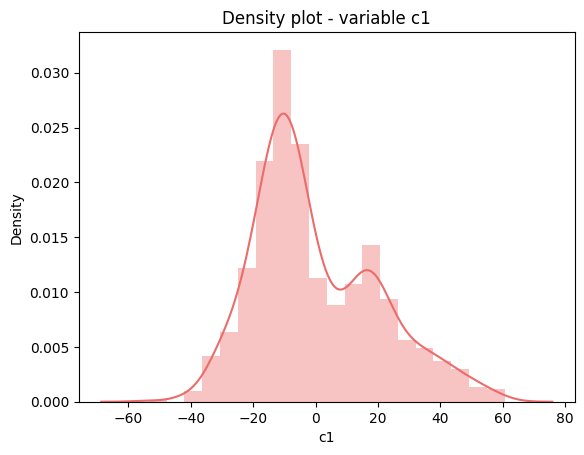

C:\Users\aleks\AppData\Local\Temp\ipykernel_26560\540614336.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.c2, color = '#eb6c6a').set(title = 'Density plot - variable c2')


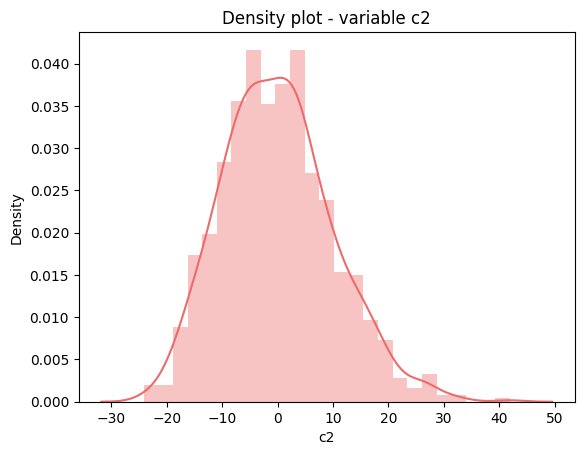

C:\Users\aleks\AppData\Local\Temp\ipykernel_26560\540614336.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.c3, color = '#eb6c6a').set(title = 'Density plot - variable c3')


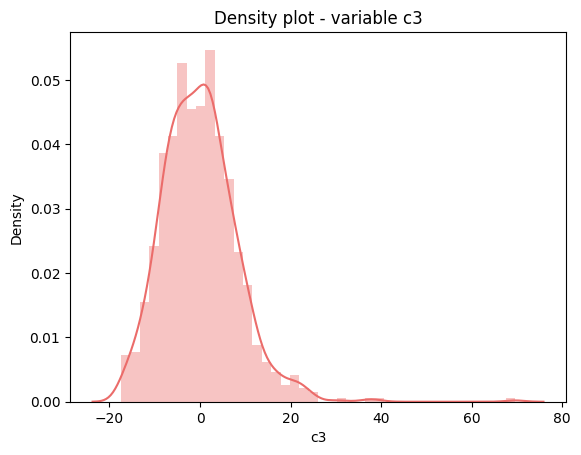

In [53]:
sns.distplot(df.c1, color = '#eb6c6a').set(title = 'Density plot - variable c1')
plt.show()
sns.distplot(df.c2, color = '#eb6c6a').set(title = 'Density plot - variable c2')
plt.show()
sns.distplot(df.c3, color = '#eb6c6a').set(title = 'Density plot - variable c3')
plt.show()

In [54]:
for col in df:
    if df[col].min() <= 0:
        df[col] = df[col] + np.abs(df[col].min()) + 1

In [55]:
df = np.log(df)

In [56]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

low_boundary = (q1 - 1.5 * iqr)
upp_boundary = (q3 + 1.5 * iqr)
num_of_outliers_L = (df[iqr.index] < low_boundary).sum()
num_of_outliers_U = (df[iqr.index] > upp_boundary).sum()
outliers = pd.DataFrame({'lower_boundary':low_boundary, 'upper_boundary':upp_boundary,'num_of_outliers__lower_boundary':num_of_outliers_L, 'num_of_outliers__upper_boundary':num_of_outliers_U})

In [57]:
outliers

,lower_boundary,upper_boundary,num_of_outliers__lower_boundary,num_of_outliers__upper_boundary
c1,2.894973,5.042191,6,0
c2,2.091366,4.245154,28,0
c3,1.662757,4.020723,32,2


In [58]:
df.head()

,c1,c2,c3
0,3.616969,3.501475,3.008649
1,3.776674,2.466042,3.525776
2,4.216087,3.098511,3.132256
3,3.691287,3.623411,2.730430
4,3.777509,3.157183,2.421594


In [59]:
df.shape

(935, 3)

In [60]:
df_ref = df.copy()

In [61]:
df_ref.shape

(935, 3)

In [62]:
for row in outliers.iterrows():
    print(row[1]['lower_boundary'])

2.8949730539999052
2.0913657864275534
1.6627573605650094


In [63]:
## Records that do not meet three ifs are deleted.
for row in outliers.iterrows():
    df = df[(df[row[0]] >= row[1]['lower_boundary']) 
            & (df[row[0]] <= row[1]['upper_boundary'])]

In [64]:
df.shape

(869, 3)

In [65]:
df = df.reset_index()

In [66]:
df = df.drop(columns=['index'])

In [67]:
df_ref['new_number'] = 'tst'

In [68]:
## decode_structures_from_clusters

for i in range(len(df_ref)):
    for m in range(len(df)):
        
        if df_ref['c1'][i] == df['c1'][m] and df_ref['c2'][i] == df['c2'][m] and df_ref['c3'][i] == df['c3'][m]:
            df_ref['new_number'][i] = m
        else:
            pass
        

C:\Users\aleks\AppData\Local\Temp\ipykernel_26560\1910909210.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref['new_number'][i] = m


In [69]:
df_ref.head() # tst means that this structure has been removed...

,c1,c2,c3,new_number
0,3.616969,3.501475,3.008649,0
1,3.776674,2.466042,3.525776,1
2,4.216087,3.098511,3.132256,2
3,3.691287,3.623411,2.730430,3
4,3.777509,3.157183,2.421594,4


In [70]:
df_ref.to_excel('../Data/clustering_numbers.xlsx')

In [71]:
scaler = StandardScaler()
scaler.fit(df)
df_std = scaler.transform(df)
df = pd.DataFrame(data=df_std, index=df.index, columns=df.columns)

C:\Users\aleks\AppData\Local\Temp\ipykernel_26560\540614336.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.c1, color = '#eb6c6a').set(title = 'Density plot - variable c1')


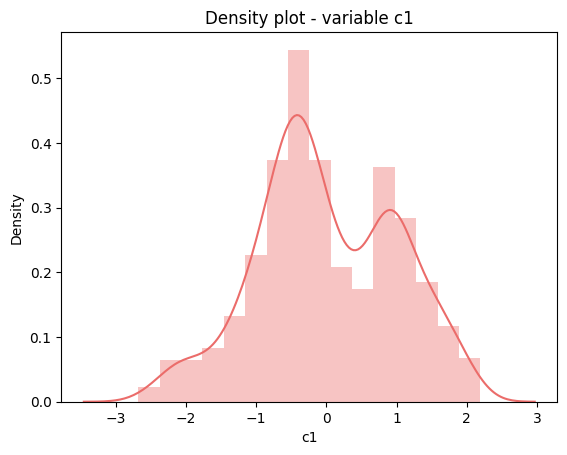

C:\Users\aleks\AppData\Local\Temp\ipykernel_26560\540614336.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.c2, color = '#eb6c6a').set(title = 'Density plot - variable c2')


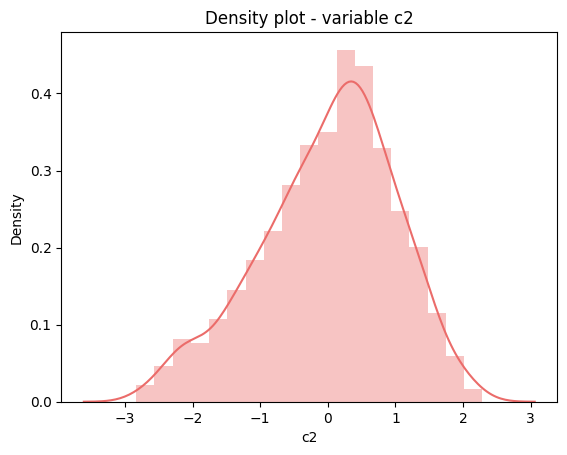

C:\Users\aleks\AppData\Local\Temp\ipykernel_26560\540614336.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.c3, color = '#eb6c6a').set(title = 'Density plot - variable c3')


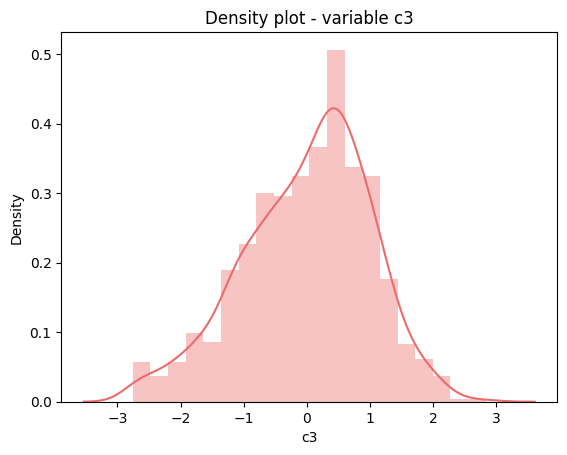

In [72]:
sns.distplot(df.c1, color = '#eb6c6a').set(title = 'Density plot - variable c1')
plt.show()
sns.distplot(df.c2, color = '#eb6c6a').set(title = 'Density plot - variable c2')
plt.show()
sns.distplot(df.c3, color = '#eb6c6a').set(title = 'Density plot - variable c3')
plt.show()

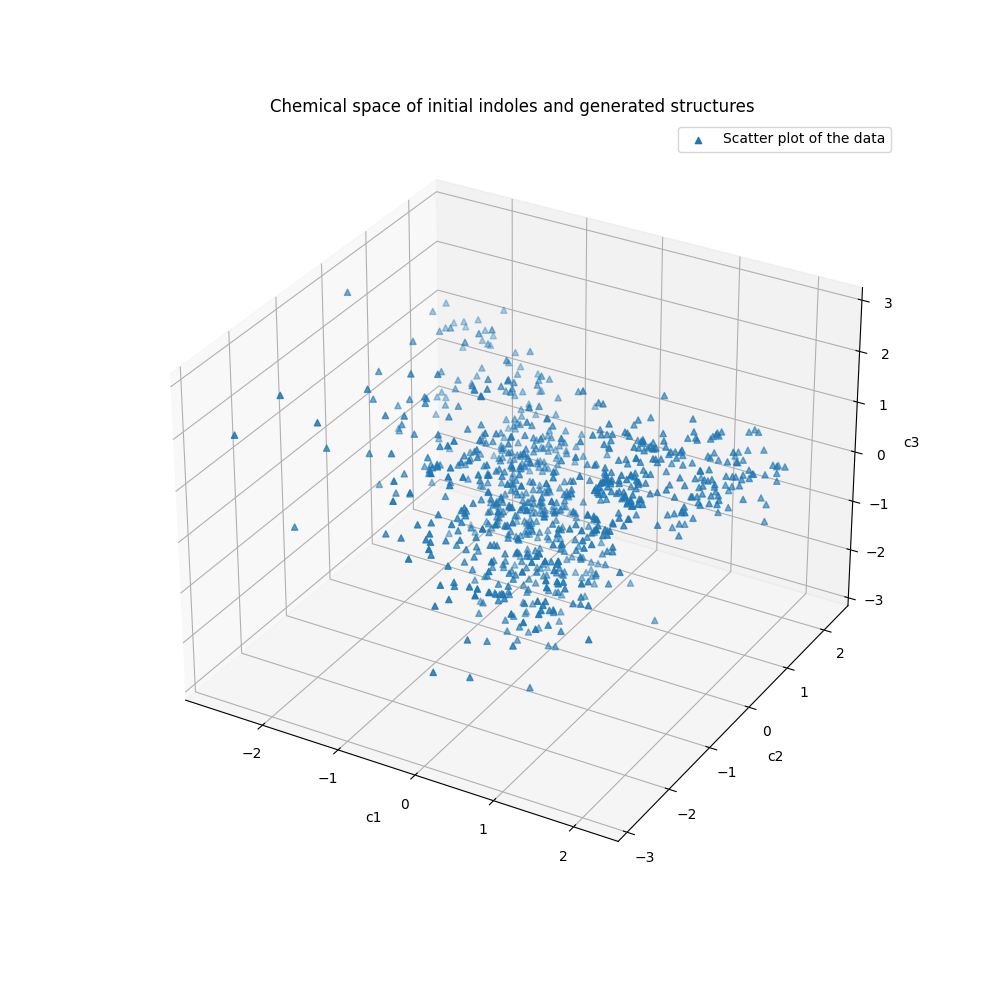

In [73]:
%matplotlib widget
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(df.c1, df.c2, df.c3, marker='^')
ax.legend(['Scatter plot of the data'])
ax.set_title('Chemical space of initial indoles and generated structures')
ax.set_xlabel('c1')
ax.set_ylabel('c2')
ax.set_zlabel('c3')
#plt.show()
plt.ion()

In [74]:
model_1 = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=10).fit(df)

C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [75]:
df['label_1'] = model_1.labels_

In [76]:
df.head()

,c1,c2,c3,label_1
0,-0.876586,0.813409,0.391195,9
1,-0.441737,-1.869713,1.647790,6
2,0.754713,-0.230792,0.691554,4
3,-0.674232,1.129383,-0.284864,9
4,-0.439463,-0.078756,-1.035321,5


In [77]:
bins = [i for i in range(10)]

In [78]:
bins

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [79]:
dfv = pd.DataFrame(data=bins, columns=['BINS'])

In [80]:
df.iloc[2]['label_1']

4.0

In [81]:
list_of_names = []
for i in range(len(bins)):
    list_of_names.append('df_'+str(i))

In [82]:
for i in range(len(bins)):
    list_of_names[i] = pd.DataFrame()

In [83]:
pd.DataFrame(df.iloc[2:5])

,c1,c2,c3,label_1
2,0.754713,-0.230792,0.691554,4
3,-0.674232,1.129383,-0.284864,9
4,-0.439463,-0.078756,-1.035321,5


In [84]:
label_0 = df.loc[df['label_1'] == 1]

In [85]:
label_0.head()

,c1,c2,c3,label_1
37,-1.272713,1.401270,0.402244,1
44,-1.521875,1.868246,0.852365,1
46,-1.722102,0.779305,0.777610,1
75,-2.424299,1.982918,1.016506,1
76,-0.981336,1.456158,0.790670,1


In [86]:
for i in range(len(list_of_names)):
    list_of_names[i] = df.loc[df['label_1'] == i]

In [87]:
for i in range(len(bins)):
    print('Label '+ str(i) + ' ', str(list_of_names[i].shape))

Label 0  (103, 4)
Label 1  (84, 4)
Label 2  (86, 4)
Label 3  (108, 4)
Label 4  (115, 4)
Label 5  (115, 4)
Label 6  (43, 4)
Label 7  (101, 4)
Label 8  (47, 4)
Label 9  (67, 4)


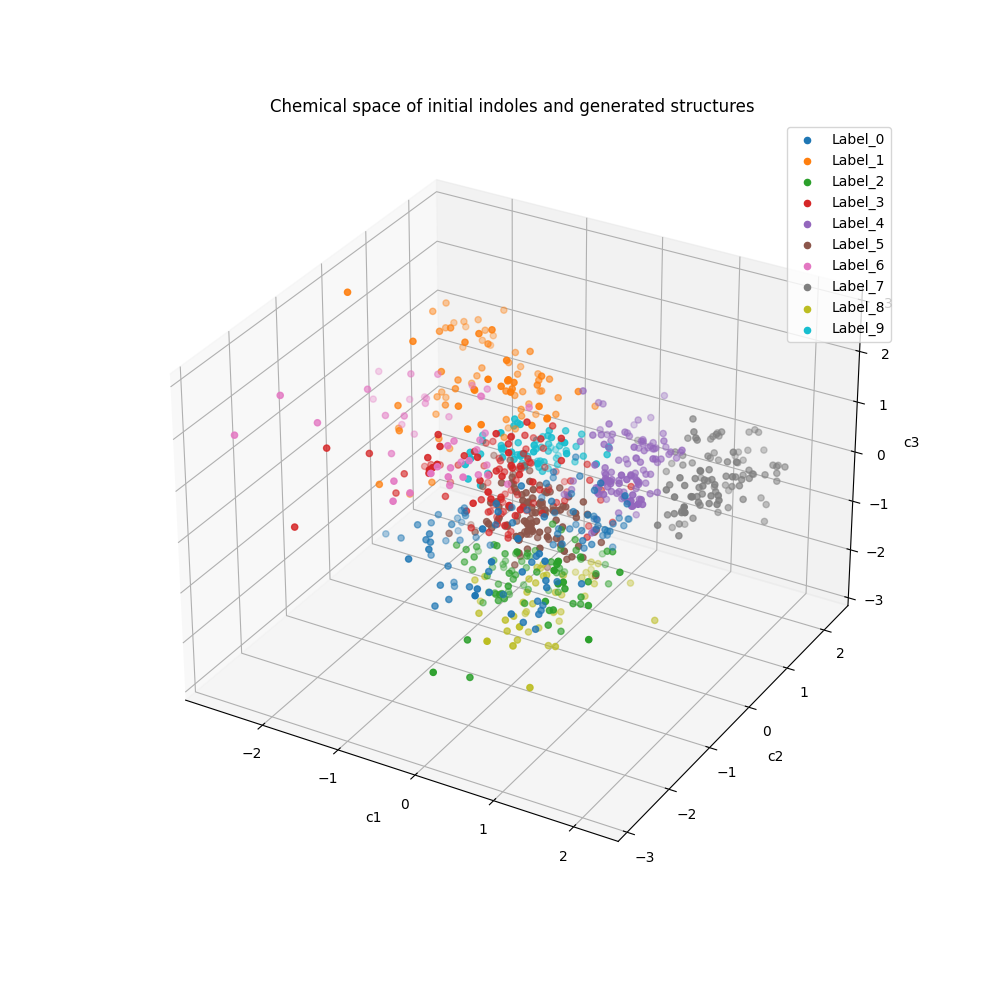

In [88]:
%matplotlib widget
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

for element in list_of_names:
    ax.scatter(element.c1, element.c2, element.c3)
#ax.scatter(df.c1, df.c2, df.c3, marker='^')
legend = []
for i in range(len(list_of_names)):
    legend.append('Label_'+ str(i))
    
ax.legend(legend)
ax.set_title('Chemical space of initial indoles and generated structures')
ax.set_xlabel('c1')
ax.set_ylabel('c2')
ax.set_zlabel('c3')
#plt.show()
plt.ion()